# Project Demonstrating Machine Learning

goal:find out what factors are causing employees to quit to improve retention rates for HR

My initial observations when exploring the data is that we have a numerous amount of variables that can affect whether someone decides to leave the company. Ethical considerations for this study include looking into duplicate surveys to make sure that a department didn't try to skew the data in their favor. 

## Import packages and load dataset

In [92]:
# Import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.tree import plot_tree

In [2]:
# IMPORT YOUR DATA. 
df0 = pd.read_csv("HR_capstone_dataset.csv")
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Data exploration: Initial EDA and data cleaning

In [32]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [33]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [34]:
df0.shape

(14999, 10)

In [4]:
df0['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

### Rename columns:
Standardizing columns so that they are in snake_case as well as correcting misspelled names

In [58]:
# column names
df = df0.copy()
df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [59]:
# Rename columns as needed
df = df.rename(columns = {'Work_accident': 'work_accident',
                         'average_montly_hours': 'average_monthly_hours',
                         'time_spend_company': 'tenure',
                         'Department':'department'})


# Display all column names after the update
df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values:

In [60]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

In [61]:
# Sum of duplicates
df.duplicated().sum()

3008

In [62]:
# Check duplicates to see if they are real duplicates 

df[df.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


we could use Baye's theorem to find the probabililty of 20% of people answering the same but because the answers are the same across 10 columns we can conclude it is unlikely that many of these are not duplicates. We will proceed with dropping duplicate columns and keeping the first duplicate. 

In [63]:

df = df.drop_duplicates(keep = 'first')

In [64]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

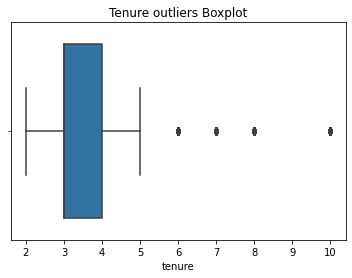

In [65]:
# Boxplot to see outliers for tenure
plt.title('Tenure outliers Boxplot')
sns.boxplot(x = df['tenure'])


In [66]:
# Determine the number of rows containing outliers
percentile25 = df['tenure'].quantile(0.25)
percentile75 = df['tenure'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('lower limit',lower_limit,'upper limit', upper_limit)


outliers = df[(df['tenure'] > upper_limit) | (df['tenure'] < lower_limit)]

print('number of rows that have tenure outlers',len(outliers))

lower limit 1.5 upper limit 5.5
number of rows that have tenure outlers 824


## End of Cleaning

Transformations I made to my data are getting rid of duplicate data because it is unlikely that 20% of people in my group decided to fill out the survey the exact same. The purpose of EDA before constructing a model is to make sure that my results aren't skewed from bad data. During this phase I kept in mind the groups of people that could skew the data. Because this is about customer retention I chose to keep those that stayed with the company a long time as they are a great example of why someone would stay for so long. 

For my models I plan on comparing different categories to the 2 groups: 'left' and 'not left'. This will give insight on which variables have the strongest affect on retention.

### Analyze Data Using Data Visualizations

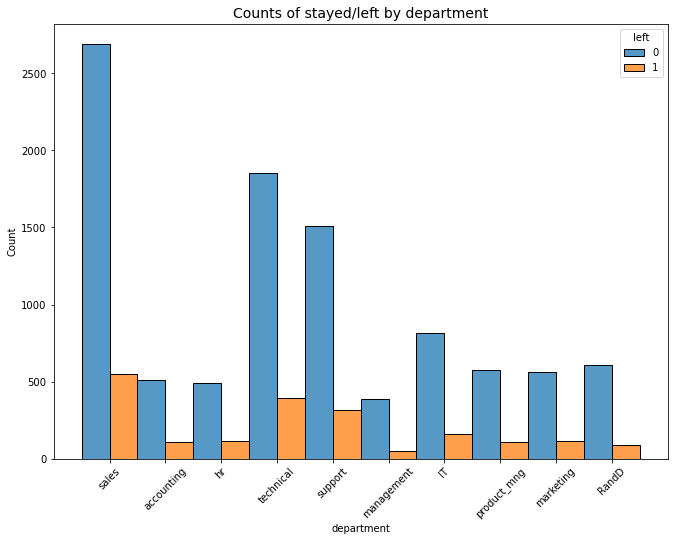

In [67]:
plt.figure(figsize=(11,8))
sns.histplot(data=df, x='department', hue='left', discrete=1 , multiple='dodge')
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);


Observations:

There are no noticable difference in retention between the difference departments

Text(0.5, 1.0, 'Number of projects histogram')

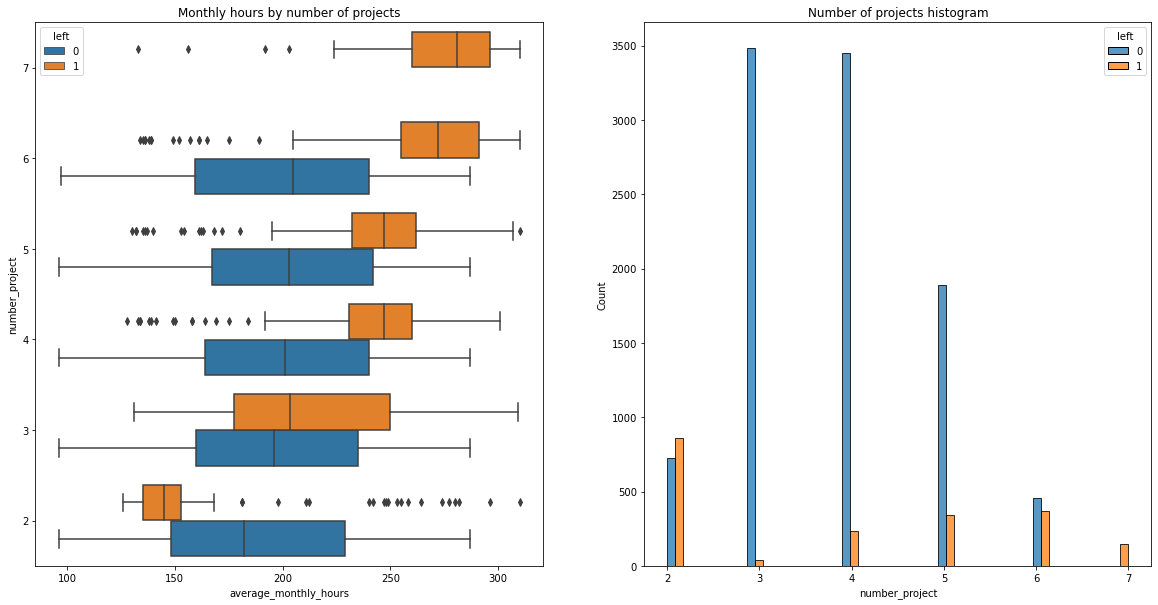

In [68]:
fig, ax = plt.subplots(1,2, figsize = (20,10))

sns.boxplot(data=df,  x = 'average_monthly_hours', y = 'number_project', hue = 'left', orient = 'h', ax = ax[0])
ax[0].set_title('Monthly hours by number of projects')
ax[0].invert_yaxis()
sns.histplot(data = df, x = 'number_project', hue = 'left', multiple = 'dodge', ax = ax[1])
ax[1].set_title('Number of projects histogram')

In [69]:
#mean/median satisfaciton scores of employees who left vs. stayed
df.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


Observations: 

3-5 projects is the best number of projects assigned per person
6-7 projects have an effect on whether someone will leave the company
people assigned 2 projects were most likely fired from producing a lack of work



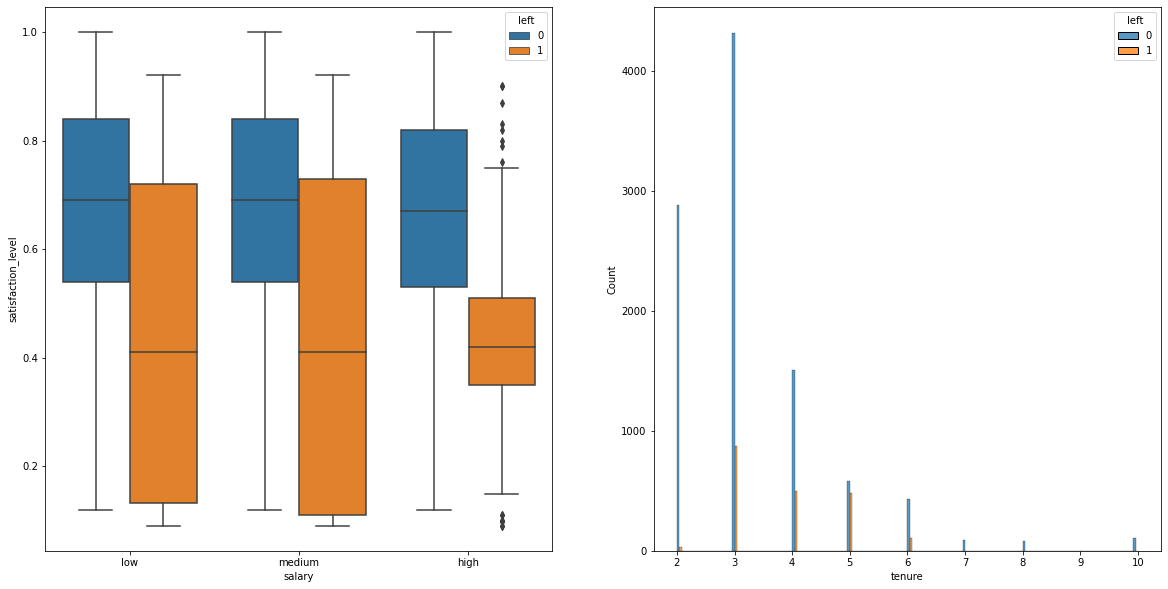

In [70]:
fig, ax = plt.subplots(1,2, figsize = (20,10))
sns.boxplot(data = df, x = 'salary',y= 'satisfaction_level', hue = 'left', ax = ax[0])
sns.histplot(data = df, x = 'tenure', hue = 'left', ax = ax[1], multiple = 'dodge')

Observations:

Salary has a not noticable impact on retention
People generally leave the company between 3-5 years

Text(0.5, 1.0, 'Monthly hours by promotion last 5 years')

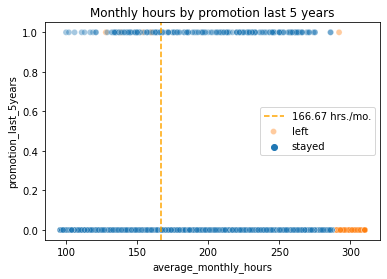

In [71]:
sns.scatterplot(data=df, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x = 166.67,color = 'orange', ls = '--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years')

Observations:

Few employees were promoted in the last 5 years
Those that were overworked didn't get promoted

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

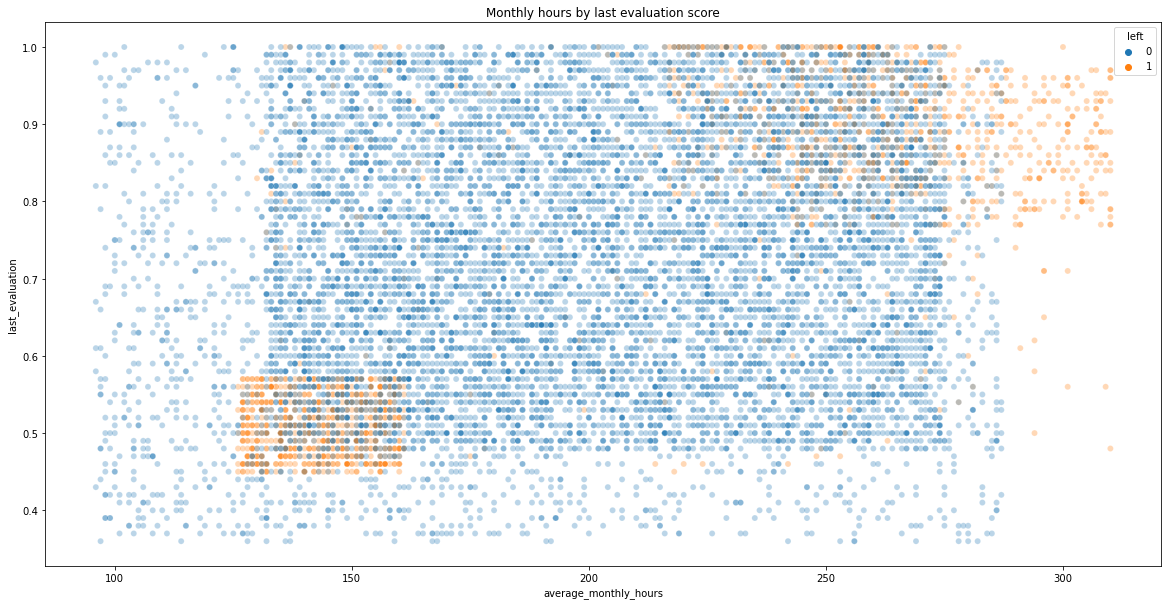

In [72]:
plt.figure(figsize = (20,10))
sns.scatterplot(data =df, x = 'average_monthly_hours', y = 'last_evaluation', hue = 'left', alpha = 0.3)
plt.title('Monthly hours by last evaluation score')

Observations: 

There are 2 groups of people that leave the company. 
    people that don't work a lot with low performance
    people that are overworked and have high performance

graph that compares people that have worked 300 hrs vs promoted

Text(0.5, 1.0, 'Whether overworked got a promotion in the last 5 years')

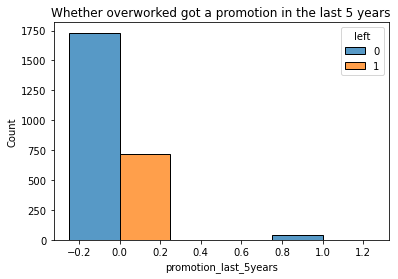

In [88]:
sns.histplot(data= overworked, x= 'promotion_last_5years', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.title('Whether overworked got a promotion in the last 5 years')

Observations:

The majority of those that were overworked were not promoted

### Insights

Low Retention rates are most likely caused by either hiring people that are low performing in the beginning years but later are from employees not moving up in the company regardless of being overworked and high evaluation scores 

The model I deem most appropriate at this time is the tree_based machine learning but you could also use a logisitic regression model

## Construct Models



In [89]:
df_model = pd.get_dummies(df)
df_model.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [95]:
y = df_model['left']
X= df_model.drop(['left'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Test 1: Random Forest

In [23]:

rf = RandomForestClassifier(random_state=0)


cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  


scoring = {'accuracy', 'precision', 'recall', 'f1'}


rf_train = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')

In [24]:
%%time

rf_train.fit(X_train, y_train)

CPU times: user 9min 50s, sys: 888 ms, total: 9min 51s
Wall time: 9min 51s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [25]:
rf_train.best_score_

0.9503790013432918

In [26]:
rf_train.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [27]:
def make_results(model_name:str, model_object, metric:str):
   
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {
                 'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'Precision': precision,
                        'Recall': recall,
                        'F1': f1,
                        'Accuracy': accuracy,
                        },
                        ignore_index=True
                       )
  
    return table

In [28]:
rf_train_results = make_results('random forest cv', rf_train, 'f1')
print(rf_train_results)

              Model  Precision    Recall        F1  Accuracy
0  random forest cv   0.990648  0.913366  0.950379  0.983945


### Test 2: Decision Tree

In [103]:
tree = DecisionTreeClassifier(random_state = 0)
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }
scoring = {'accuracy', 'precision', 'recall', 'f1'}


tree_train = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='f1')

In [104]:
tree_train.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [105]:
tree_train.best_params_

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [107]:
tree_train.best_score_

0.9438785458925683

In [108]:
tree_train_results = make_results('decision tree', tree_train, 'f1')
tree_train_results

,Model,Precision,Recall,F1,Accuracy
0,decision tree,0.973121,0.91646,0.943879,0.981651


In [109]:
results = [tree_train_results, rf_train_results]
results

[           Model  Precision   Recall        F1  Accuracy
 0  decision tree   0.973121  0.91646  0.943879  0.981651,
               Model  Precision    Recall        F1  Accuracy
 0  random forest cv   0.990648  0.913366  0.950379  0.983945]

### testing models

In [29]:
pred = rf_train.best_estimator_.predict(X_test)
cm= confusion_matrix(y_test, pred, labels = rf_train.classes_)


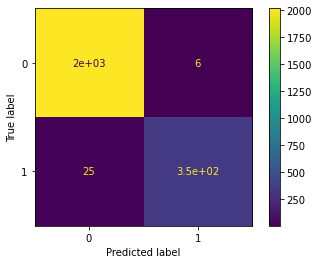

In [30]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_train.classes_)
disp.plot()

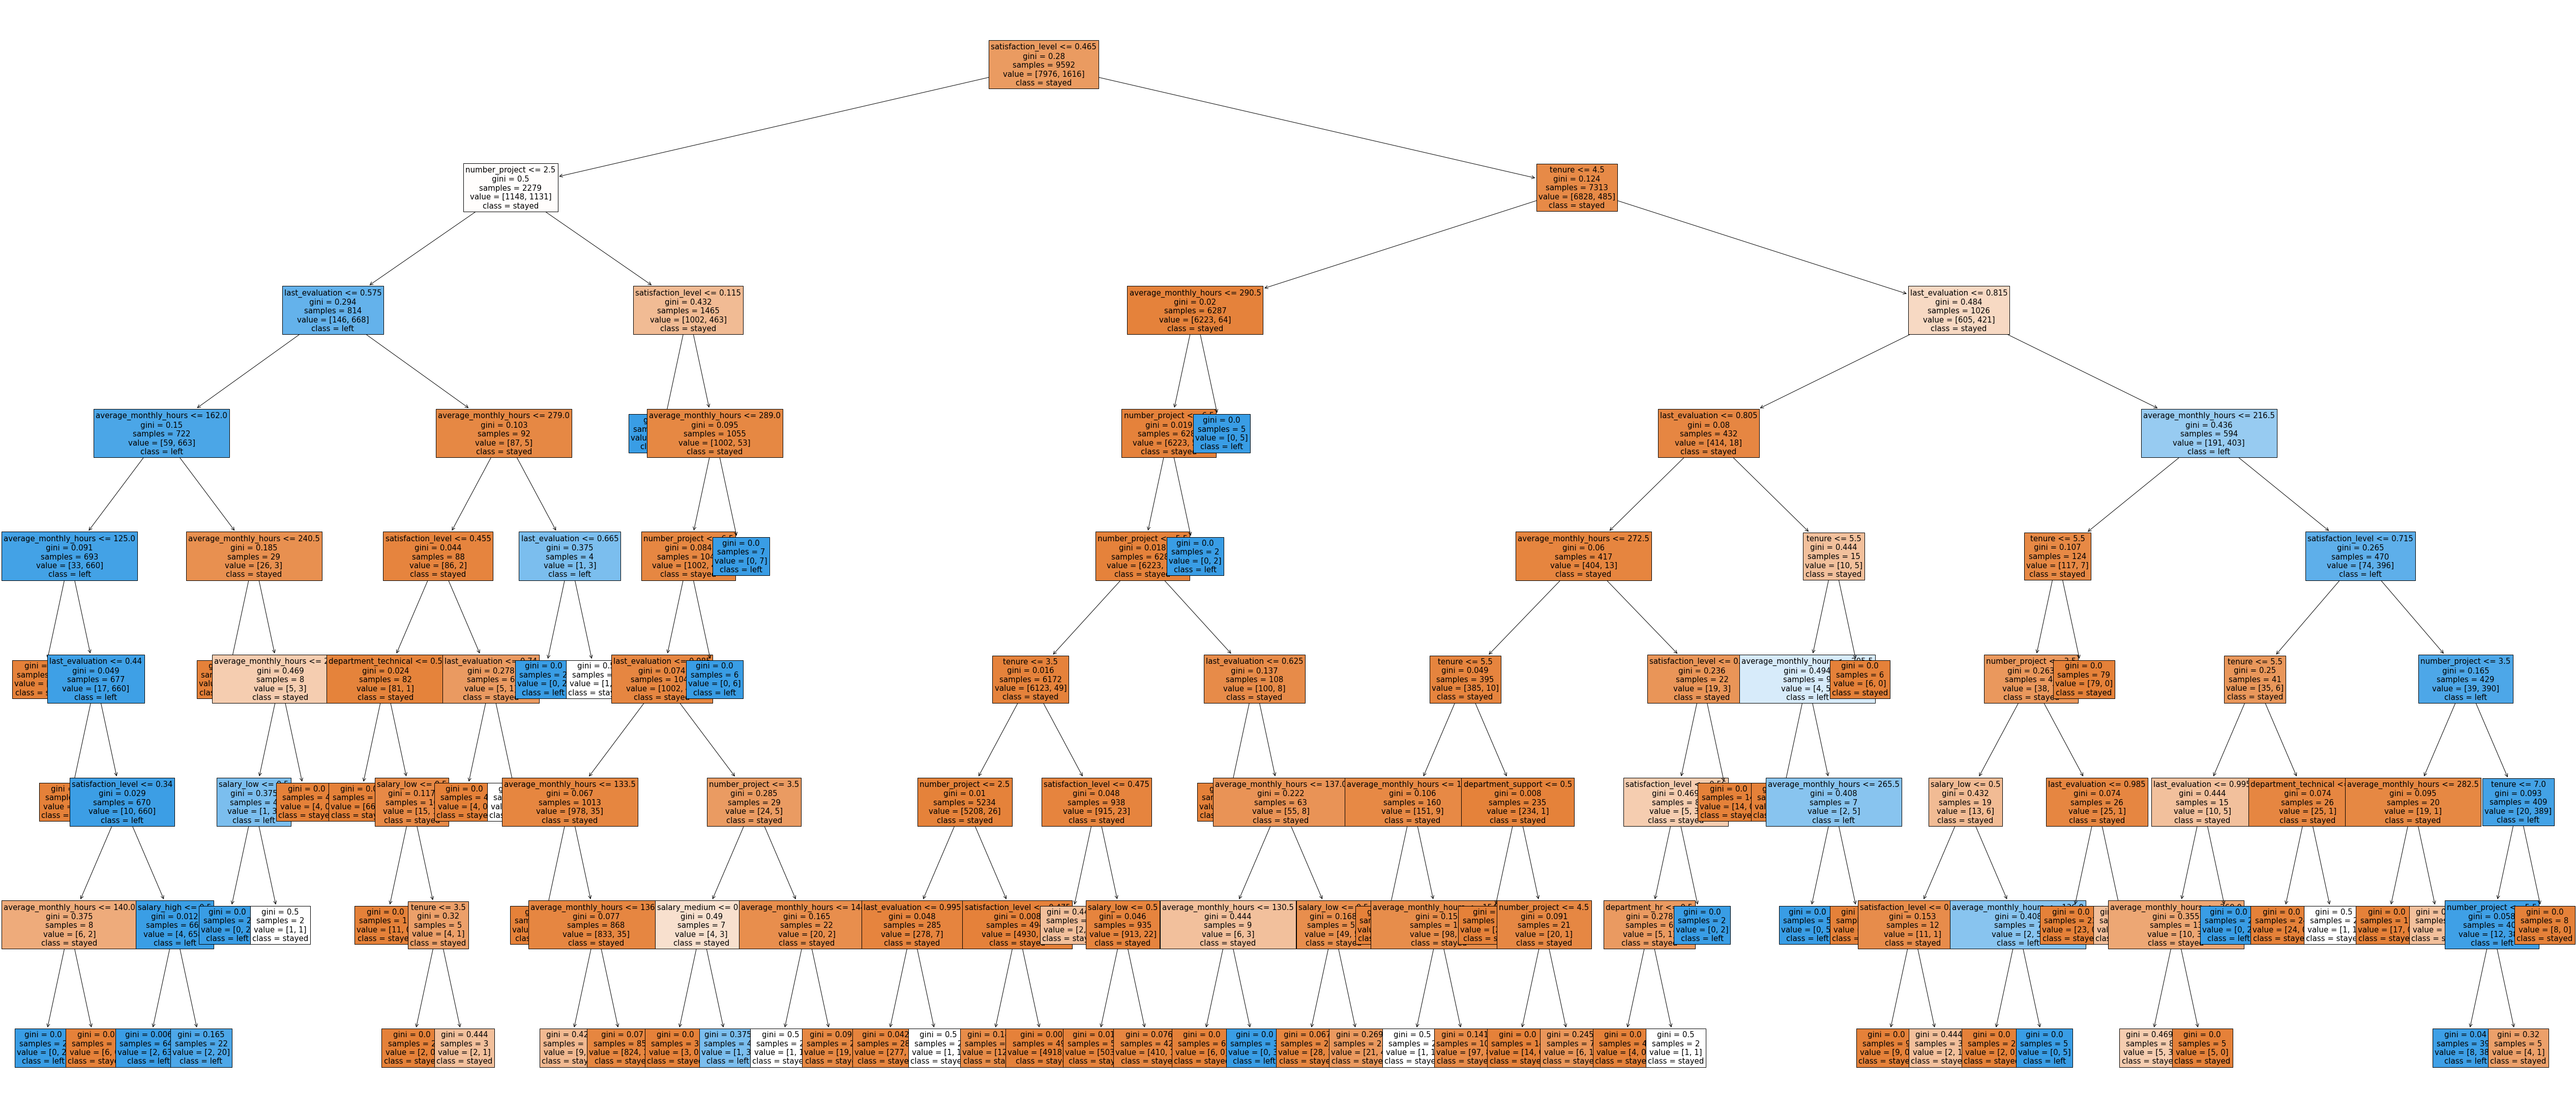

In [114]:
plt.figure(figsize= (90, 40))
plot_tree(tree_train.best_estimator_, max_depth = 8, fontsize = 15, feature_names = X.columns,
        class_names = {0:'stayed', 1:'left'}, filled = True)
plt.show()

In [122]:
tree_importances = pd.DataFrame(tree_train.best_estimator_.feature_importances_, columns=['importance'], index=X.columns)
tree_importances = tree_importances[tree_importances['importance'] !=0]
tree_importances

,importance
satisfaction_level,0.501295
last_evaluation,0.141303
number_project,0.131245
average_monthly_hours,0.098812
tenure,0.123615
department_hr,0.000271
department_support,0.000035
department_technical,0.000416
salary_high,0.000133
salary_low,0.002089


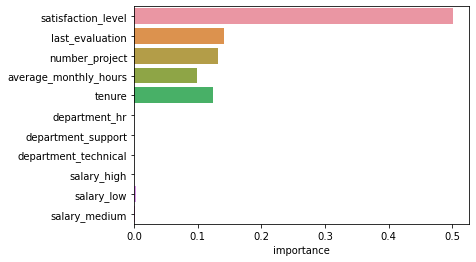

In [127]:
sns.barplot(data = tree_importances, x = 'importance', y = tree_importances.index)

## Conclusion

Satisfaction_level, number_projects, last_evaluation, tenure, and average_monthly_hours are the best indicators as to whether or not someone will leave the company. 

Actions to consider taking are 
* limiting projects assigned to each person to 5
* improve current evaluation metrics
* limit number of hours to reduce overworked employees 
* consider promoting employees who have been with the company for more than 4 years or find out why they often leave


Considering how high our precision, recall, f1, and accuracy scores were it is possible there could be some data leakage. It may be useful to create more tests if not satified with results. 